# Your first time series

you'll create a week of data, iterate over the result, and obtain the dayofweek and `day_name()` for each date.

In [2]:
import pandas as pd
# Create the range of dates here
seven_days = pd.date_range(start='2017-1-1', periods=7, freq='D')

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())



6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


# Create a time series of air quality data

We have prepared a data set with air quality data (ozone, pm25, and carbon monoxide for NYC, 2000-2017) for you to practice the use of `pd.to_datetime()`.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1898 non-null   object 
 1   Chicago      1898 non-null   float64
 2   Los Angeles  1898 non-null   float64
 3   New York     1898 non-null   float64
dtypes: float64(3), object(1)
memory usage: 59.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB
None


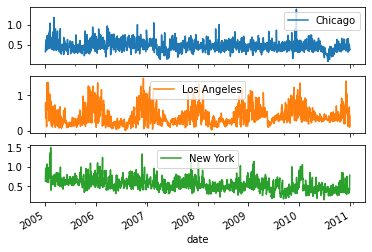

In [4]:
import matplotlib.pyplot as plt
data = pd.read_csv('dataset/co_cities.csv')

# Inspect data
print(data.info())

# Convert the date column to datetime64
data.date = pd.to_datetime(data.date)

# Set date column as index
data.set_index('date', inplace= True)

# Inspect data 
print(data.info())

# Plot data
data.plot( subplots=True)
plt.show()


# Compare annual stock price trends

You'll use this to compare the performance for three years of Yahoo stock prices.

In [21]:
yahoo = pd.read_csv("dataset/yahoo.csv", parse_dates=['date']) # , 
yahoo = yahoo.set_index('date')
# yahoo.index
yahoo.head()
yahoo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2013-01-02 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   756 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


In [24]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ["2013", "2014", "2015"]:
    price_per_year = yahoo.loc[year, ["price"]].reset_index(drop=True)
    price_per_year.rename(columns={"price": year}, inplace=True)
    print(price_per_year.head())
    prices = pd.concat([prices, price_per_year], axis=1)

prices.head()

    2013
0  20.08
1  19.78
2  19.86
3  19.40
4  19.66
    2014
0    NaN
1  39.59
2  40.12
3  39.93
4  40.92
    2015
0    NaN
1  50.17
2  49.13
3  49.21
4  48.59


,2013,2014,2015
0,20.08,NaN,NaN
1,19.78,39.59,50.17
2,19.86,40.12,49.13
3,19.40,39.93,49.21
4,19.66,40.92,48.59


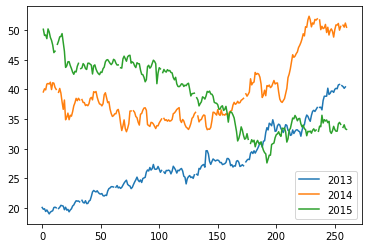

In [25]:
# Plot prices
prices.plot()
plt.show()


# Set and change time series frequency

you'll use data on the daily carbon monoxide concentration in NYC, LA and Chicago from 2005-17.

You'll set the frequency to calendar daily and then resample to monthly frequency, and visualize both series to see how the different frequencies affect the data

In [29]:
co = pd.read_csv("dataset/co_cities.csv", parse_dates=['date']) # , 
co = co.set_index('date')
# yahoo.index
co.head()

,Chicago,Los Angeles,New York
date,,,
2005-01-01,0.317763,0.777657,0.639830
2005-01-03,0.520833,0.349547,0.969572
2005-01-04,0.477083,0.626630,0.905208
2005-01-05,0.348822,0.613814,0.769176
2005-01-06,0.572917,0.792596,0.815761


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB
None


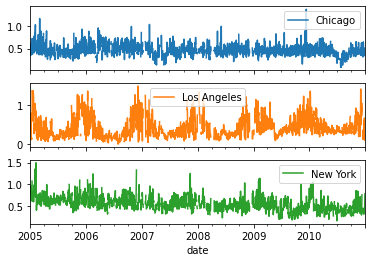

In [30]:
# Inspect data
print(co.info())

# Set the frequency to calendar daily
co = co.asfreq("D")

# Plot the data
co.plot(subplots = True)
plt.show()



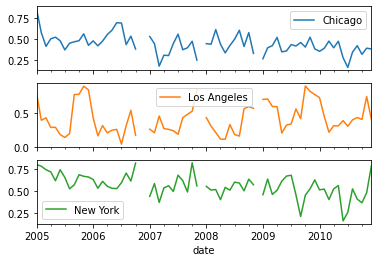

In [31]:

# Set frequency to monthly
co = co.asfreq("M")

# Plot the data
co.plot(subplots = True)
plt.show()



# Shifting stock prices across time

Let's use shift to visually compare a stock price series for Google shifted 90 business days into both past and future.

In [32]:
# Import data here
google = pd.read_csv('dataset/google.csv', parse_dates=['Date'], index_col='Date')
google.head()



,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [33]:
# Set data frequency to business daily
google = google.asfreq("B")
google.head()


,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04


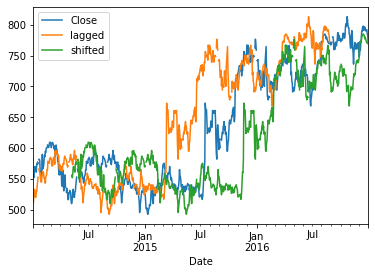

In [34]:
# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(periods=-90)
google['shifted'] =  google.Close.shift(periods=90)

# Plot the google price series
google.plot()

plt.show()

# Calculating stock price changes

 Now you'll practice a similar calculation to calculate absolute changes from current and shifted prices, and compare the result to the function `.diff()`.

In [35]:
# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(periods = 30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo.price.sub(yahoo.shifted_30)

# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(30)

# Inspect the last five rows of price
print(yahoo.tail(5))


            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64


In [36]:

# Show the value_counts of the difference between change_30 and diff_30
result = yahoo['change_30'].sub(yahoo['diff_30'])
print(result.value_counts())


0.0    703
dtype: int64


# Plotting multi-period returns

 Let's use this function `.pct_change()` to calculate returns for various calendar day periods, and plot the result to compare the different patterns.

We'll be using Google stock prices from 2014-2016.

In [38]:
# Create daily_return
google['daily_return'] = google['Close'].pct_change(periods = 1).mul(100)

# Create monthly_return
google['monthly_return'] = google['Close'].pct_change(periods = 30).mul(100)

# Create annual_return
google['annual_return'] = google['Close'].pct_change(periods = 360).mul(100)

google.head()


,Close,lagged,shifted,daily_return,monthly_return,annual_return
Date,,,,,,
2014-01-02,556.00,511.00,NaN,NaN,NaN,NaN
2014-01-03,551.95,518.73,NaN,-0.728417,NaN,NaN
2014-01-06,558.10,529.92,NaN,1.114231,NaN,NaN
2014-01-07,568.86,533.09,NaN,1.927970,NaN,NaN
2014-01-08,570.04,526.65,NaN,0.207432,NaN,NaN


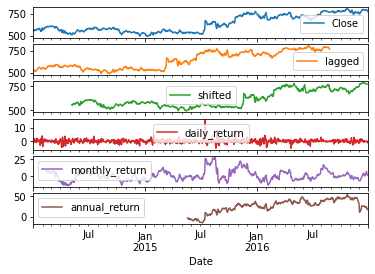

In [39]:
# Plot the result
google.plot(subplots=True)
plt.show()